In [1]:
# Import required packages
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt

def tesseract_ocr (input_dir: str) -> str:
    # Mention the installed location of Tesseract-OCR in your system
    pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    img = cv2.imread(input_dir)
    plt.imshow(img)
    plt.axis('off')
    # Preprocessing the image starts

    # Convert the image to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Performing OTSU threshold
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Specify structure shape and kernel size.
    # Kernel size increases or decreases the area
    # of the rectangle to be detected.
    # A smaller value like (10, 10) will detect
    # each word instead of a sentence.
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

    # Applying dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

    # Finding contours
    contours, hierarchy = cv2.findContours(
        dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    # Creating a copy of image
    im2 = img.copy()
    # Looping through the identified contours
    # Then rectangular part is cropped and passed on
    # to pytesseract for extracting text from it
    # Extracted text is then written into the text file
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Drawing a rectangle on copied image
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Cropping the text block for giving input to OCR
        cropped = im2[y:y + h, x:x + w]

        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped)

    return text
    

Original text:  3tOMOjoopJaSB
Recognized text:  stOMOjoopJaSB


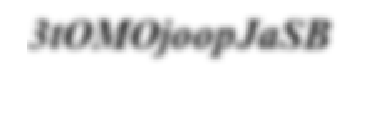

In [2]:
original_txt = "3tOMOjoopJaSB"
recog_txt = tesseract_ocr("./images2/3tOMOjoopJaSB.png")
print("Original text: ", original_txt)
print("Recognized text: ", recog_txt)

Original text:  M90R5Ztlmyyy1
Recognized text:  M9ORSZtImyyy1


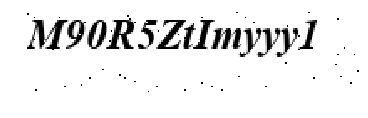

In [3]:
original_txt = "M90R5Ztlmyyy1"
recog_txt = tesseract_ocr("./images2/M90R5ZtImyyy1.png")
print("Original text: ", original_txt)
print("Recognized text: ", recog_txt)

Original text:  of the reaping. I prop myself up on one elbow. The
Recognized text:  of the reaping. | prop myself up on one elbow. The


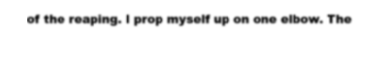

In [4]:
original_txt = "of the reaping. I prop myself up on one elbow. The"
recog_txt = tesseract_ocr("./image_text_2/image6.png")
print("Original text: ", original_txt)
print("Recognized text: ", recog_txt)

Original text:  ttle sister, Prim, curled up on her side, cocooned 
Recognized text:  ttle sister, Prim, curled up on her side,


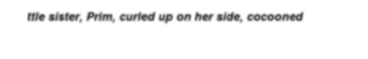

In [5]:
original_txt = "ttle sister, Prim, curled up on her side, cocooned "
recog_txt = tesseract_ocr("./image_text_2/image8.png")
print("Original text: ", original_txt)
print("Recognized text: ", recog_txt)

Original text:   in my mothers body, their cheeks pressed together
Recognized text:  in my mothers body, their cheeks pressed together


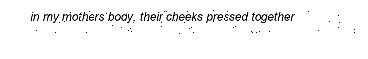

In [6]:
original_txt = " in my mothers body, their cheeks pressed together"
recog_txt = tesseract_ocr("./image_text_2/image9.png")
print("Original text: ", original_txt)
print("Recognized text: ", recog_txt)